In [1]:
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt

In [2]:
# Percorso alla cartella che contiene i CSV
folder_path = 'data/df' 

# Trova tutti i file che terminano con _invoices.csv
invoice_files = glob.glob(os.path.join(folder_path, '*_invoices.csv'))

# Trova tutti i file che terminano con _invoices_details.csv
invoice_details_files = glob.glob(os.path.join(folder_path, '*_invoices_details.csv'))

# Leggi e concatena tutti i file in un unico DataFrame
df_invoices = pd.concat([pd.read_csv(file) for file in invoice_files], ignore_index=True)
df_invoices_details = pd.concat([pd.read_csv(file) for file in invoice_details_files], ignore_index=True)

In [3]:
# Seleziona solo le colonne necessarie da df_invoices
df_invoices_reduced = df_invoices[['Data_Fattura', 'Nr_Fattura', 'Denominazione_Mittente', 'IdCodice_Mittente']]

# Esegui il merge
df_invoices_details = df_invoices_details.merge(
    df_invoices_reduced,
    on=['Data_Fattura', 'Nr_Fattura'],
    how='left'
)

## Spese mensili

In [4]:
df_invoices['Mese_Fattura'] = pd.to_datetime(df_invoices['Data_Fattura']).dt.month
df_invoices_details['Mese_Fattura'] = pd.to_datetime(df_invoices_details['Data_Fattura']).dt.month

In [5]:
df_invoices.groupby('Mese_Fattura')['Importo_totale_doc'].sum()

Mese_Fattura
2    37085.00
4    41912.17
5    27471.55
6    27820.19
7     2145.09
Name: Importo_totale_doc, dtype: float64

In [6]:
df_invoices_details.groupby('Mese_Fattura')['Prezzo_ivato'].sum()

Mese_Fattura
2    37085.009200
4    42181.724000
5    27535.289766
6    27950.621740
7     2162.135080
Name: Prezzo_ivato, dtype: float64

In [7]:
df_invoices_details.loc[df_invoices_details.Denominazione_Mittente == 'FRATELLI TRUSSONI SRL UNIPERSONALE -Soc. sogg.dir.e coord.La Trus Srl'].Prezzo_ivato.sum()

np.float64(34412.5128)

## Save excel to upload

In [8]:
df_invoices_details.to_excel('data/250713_df_invoices_details.xlsx', index=False)

## Grafici

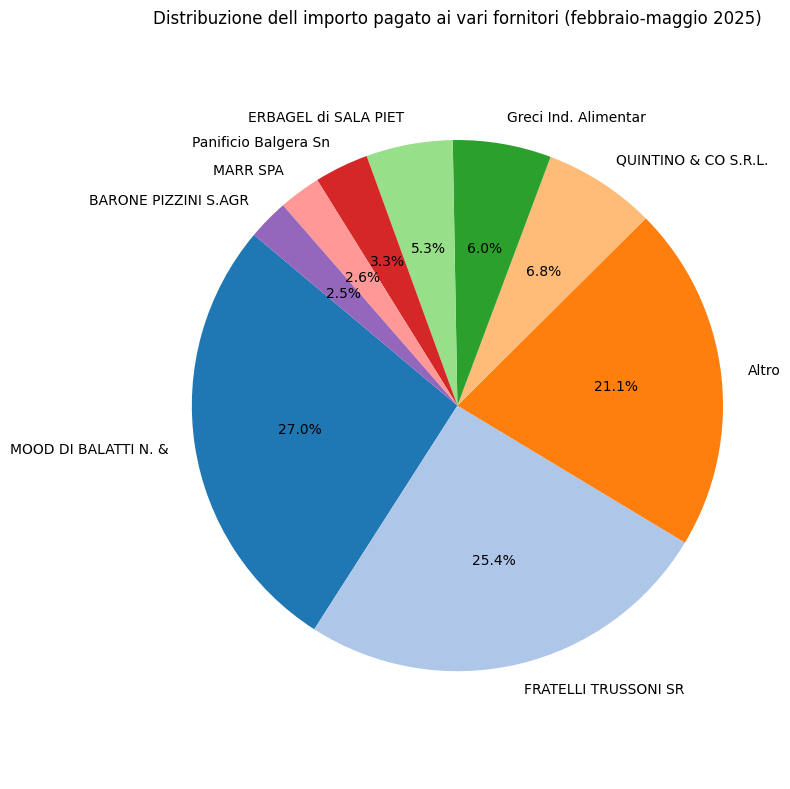

In [ ]:
# Raggruppa e somma
grouped = df_invoices_details.groupby('Denominazione_Mittente')['Prezzo_ivato'].sum()

# Calcola le percentuali
percent = grouped / grouped.sum()

# Dividi in main e altri
main = grouped[percent >= 0.02]
other = grouped[percent < 0.02]
main['Altro'] = other.sum()

# Ordina dal più grande al più piccolo
main = main.sort_values(ascending=False)

# Crea le etichette tagliate a 20 caratteri
labels = [label[:20] for label in main.index]

# Palette colori
colors = plt.get_cmap('tab20').colors
n_colors = len(colors)
n_slices = len(main)
colors_to_use = [colors[i % n_colors] for i in range(n_slices)]

# Grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(main, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors_to_use)
plt.title('Distribuzione dell importo pagato ai vari fornitori (febbraio-maggio 2025)')
plt.axis('equal')
plt.tight_layout()
plt.show()

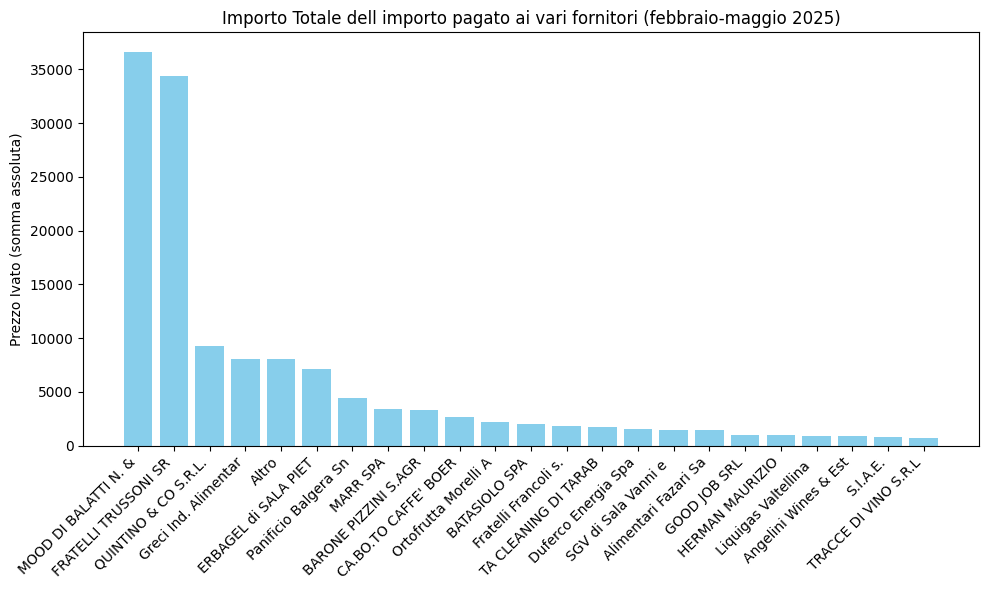

In [4]:
# Raggruppa e somma
grouped = df_invoices_details.groupby('Denominazione_Mittente')['Prezzo_ivato'].sum()

# Calcola le percentuali per "Altro"
percent = grouped / grouped.sum()

# Dividi in main e altri
main = grouped[percent >= 0.005]
other = grouped[percent < 0.005]
main['Altro'] = other.sum()

# Ordina dal più grande al più piccolo
main = main.sort_values(ascending=False)

# Etichette accorciate a 20 caratteri
labels = [label[:20] for label in main.index]

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(labels, main, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prezzo Ivato (somma assoluta)')
plt.title('Importo Totale dell importo pagato ai vari fornitori (febbraio-maggio 2025)')
plt.tight_layout()
plt.show()

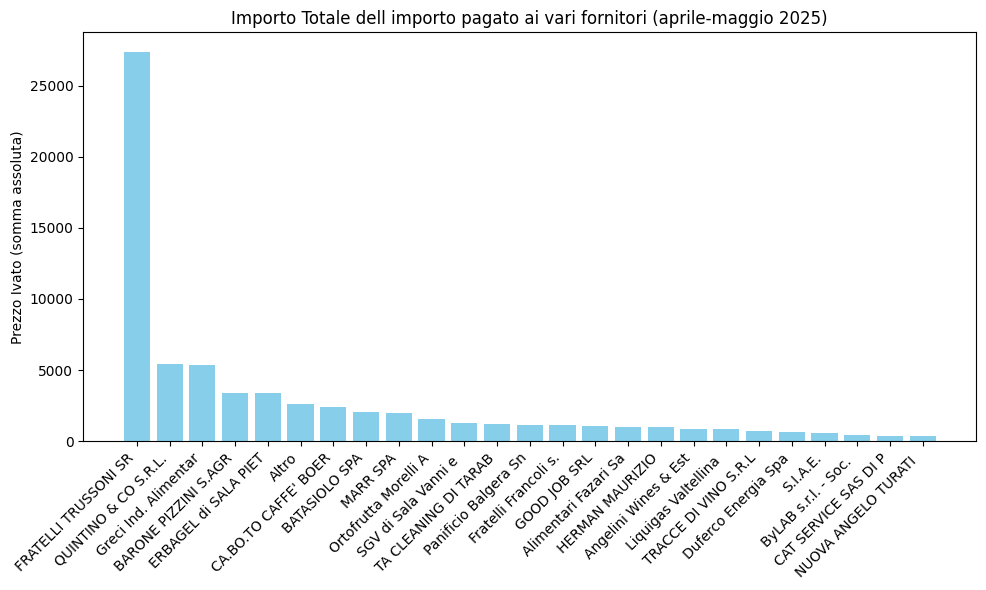

In [5]:
# Raggruppa e somma
df_filtered = df_invoices_details.loc[df_invoices_details['Data_Fattura'].str.startswith(('2025-04', '2025-05'))]
grouped = df_filtered.groupby('Denominazione_Mittente')['Prezzo_ivato'].sum()

# Calcola le percentuali per "Altro"
percent = grouped / grouped.sum()

# Dividi in main e altri
main = grouped[percent >= 0.005]
other = grouped[percent < 0.005]
main['Altro'] = other.sum()

# Ordina dal più grande al più piccolo
main = main.sort_values(ascending=False)

# Etichette accorciate a 20 caratteri
labels = [label[:20] for label in main.index]

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(labels, main, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prezzo Ivato (somma assoluta)')
plt.title('Importo Totale dell importo pagato ai vari fornitori (aprile-maggio 2025)')
plt.tight_layout()
plt.show()

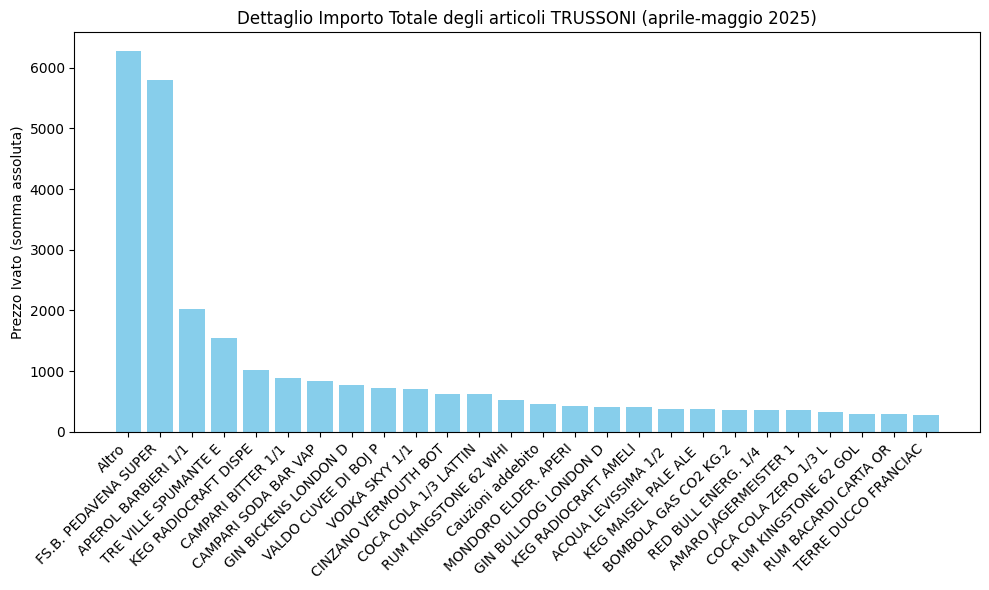

In [6]:
# Raggruppa e somma
df_filtered = df_invoices_details.loc[df_invoices_details['Data_Fattura'].str.startswith(('2025-04', '2025-05'))]
df_filtered = df_filtered.loc[df_filtered.Denominazione_Mittente == 'FRATELLI TRUSSONI SRL UNIPERSONALE -Soc. sogg.dir.e coord.La Trus Srl']
grouped = df_filtered.groupby('Descrizione')['Prezzo_ivato'].sum()

# Calcola le percentuali per "Altro"
percent = grouped / grouped.sum()

# Dividi in main e altri
main = grouped[percent >= 0.01]
other = grouped[percent < 0.01]
main['Altro'] = other.sum()

# Ordina dal più grande al più piccolo
main = main.sort_values(ascending=False)

# Etichette accorciate a 20 caratteri
labels = [label[:20] for label in main.index]

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(labels, main, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prezzo Ivato (somma assoluta)')
plt.title('Dettaglio Importo Totale degli articoli TRUSSONI (aprile-maggio 2025)')
plt.tight_layout()
plt.show()

In [7]:
# df_invoices.to_csv('data/df_invoices_02_05.csv', index=False)
# df_invoices_details.to_csv('data/df_invoices_details_02_05.csv', index=False)